In [1]:
import numpy as np
import os
import sys
import pickle
from graph_viz_utils import *

In [2]:
import numpy as np
import os
import sys
import pickle
import networkx as nx
import collections
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import rankdata


def get_spectral_graph_positions():
    """
    Get positions of EEG electrodes for visualizations
    """
    file = '../data/electrode_graph/adj_mx_3d.pkl'

    with open(file, 'rb') as f:
        adj_mx_all = pickle.load(f)
    adj_mx = adj_mx_all[-1]

    node_id_dict = adj_mx_all[1]

    eeg_viz = nx.Graph()
    adj_mx = adj_mx_all[-1]
    node_id_label = collections.defaultdict()

    for i in range(adj_mx.shape[0]):
        eeg_viz.add_node(i)

    for k, v in node_id_dict.items():
        node_id_label[v] = k
    # Add edges
    for i in range(adj_mx.shape[0]):
        for j in range(
                adj_mx.shape[1]):  # do no include self-edge in visualization
            if i != j and adj_mx[i, j] > 0:
                eeg_viz.add_edge(i, j)

    pos = nx.spectral_layout(eeg_viz)
    # keep the nice shape of the electronodes on the scalp
    pos_spec = {node: (y, -x) for (node, (x, y)) in pos.items()}

    return pos_spec


def draw_graph_weighted_edge(
        adj_mx,
        node_id_dict,
        pos_spec,
        is_directed,
        title='',
        save_dir=None,
        fig_size=(
            12,
            8),
    node_color='Red',
    font_size=20,
        plot_colorbar=False):
    """
    Draw a graph with weighted edges
    Args:
        adj_mx: Adjacency matrix for the graph, shape (num_nodes, num_nodes
        node_id_dict: dict, key is node name, value is node index
        pos_spec: Graph node position specs from function get_spectral_graph_positions
        is_directed: If True, draw directed graphs
        title: str, title of the figure
        save_dir: Dir to save the plot
        fig_size: figure size

    """
    eeg_viz = nx.DiGraph() if is_directed else nx.Graph()
    node_id_label = collections.defaultdict()

    for i in range(adj_mx.shape[0]):
        eeg_viz.add_node(i)

    for k, v in node_id_dict.items():
        node_id_label[v] = k

    # Add edges
    for i in range(adj_mx.shape[0]):
        for j in range(adj_mx.shape[1]):  # since it's now directed
            if i != j and adj_mx[i, j] > 0:
                eeg_viz.add_edge(i, j, weight=adj_mx[i, j])

    edges, weights = zip(*nx.get_edge_attributes(eeg_viz, 'weight').items())

    # Change the color scales below
    k = 3
    cmap = plt.cm.Greys(np.linspace(0, 1, (k + 1) * len(weights)))
    cmap = matplotlib.colors.ListedColormap(cmap[len(weights):-1:(k - 1)])

    plt.figure(figsize=fig_size)
    nx.draw_networkx(eeg_viz, pos_spec, labels=node_id_label, with_labels=True,
                     edgelist=edges, edge_color=rankdata(weights),
                     width=fig_size[1] / 2, edge_cmap=cmap, font_weight='bold',
                     node_color=node_color,
                     node_size=250 * (fig_size[0] + fig_size[1]),
                     font_color='white',
                     font_size=font_size)
    plt.title(title, fontsize=font_size)
    plt.axis('off')
    if plot_colorbar:
        sm = plt.cm.ScalarMappable(
            cmap=cmap, norm=plt.Normalize(
                vmin=0, vmax=1))
        sm.set_array([])
        plt.colorbar(sm)
    plt.tight_layout()
    if save_dir is not None:
        plt.savefig(save_dir, dpi=300)

    plt.show()


# Visualize distance graph

In [3]:
with open('../data/electrode_graph/adj_mx_3d.pkl', 'rb') as pf:
    adj_mx_data = pickle.load(pf)

In [4]:
# Pre-computed adjacency matrix for distance graph
adj_mx = adj_mx_data[2]
adj_mx.shape

(19, 19)

In [5]:
# Remove "EEG" in the node name
node_id_dict = {}
for key, val in adj_mx_data[1].items():
    key = key.split(' ')[-1]
    node_id_dict[key] = val
node_id_dict

{'FP1': 0,
 'FP2': 1,
 'F3': 2,
 'F4': 3,
 'C3': 4,
 'C4': 5,
 'P3': 6,
 'P4': 7,
 'O1': 8,
 'O2': 9,
 'F7': 10,
 'F8': 11,
 'T3': 12,
 'T4': 13,
 'T5': 14,
 'T6': 15,
 'FZ': 16,
 'CZ': 17,
 'PZ': 18}

In [6]:
# Get positions of nodes
pos_spec = get_spectral_graph_positions()

/tmp/ipykernel_1280140/2471675852.py:109: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


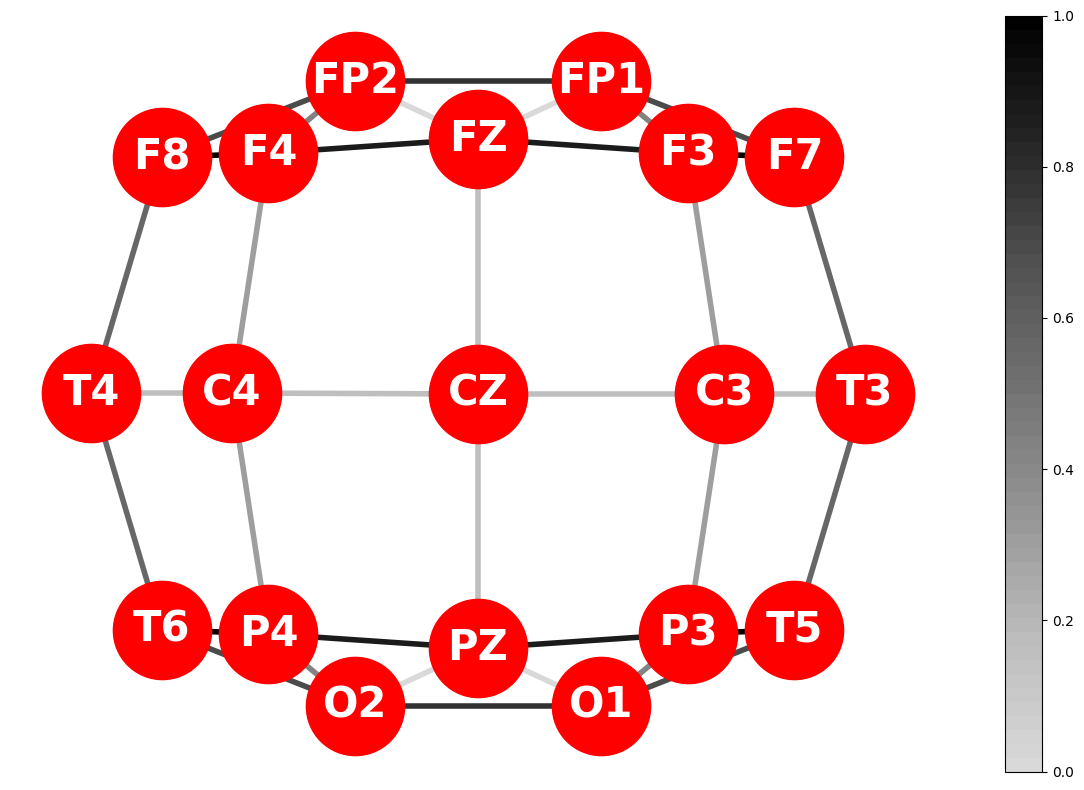

In [7]:
draw_graph_weighted_edge(adj_mx, node_id_dict, pos_spec, is_directed=False, plot_colorbar=True, font_size=30)

# Visualize correlation graphs

Similarly, you can use `draw_graph_weighted_edge` function to visualize correlation graphs by specifying the corresponding `adj_mx` and `is_directed = True`. To get adjacency matrices for correlation graphs, you can use the corresponding dataloader in `../data` folder.

/tmp/ipykernel_1280140/2471675852.py:109: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


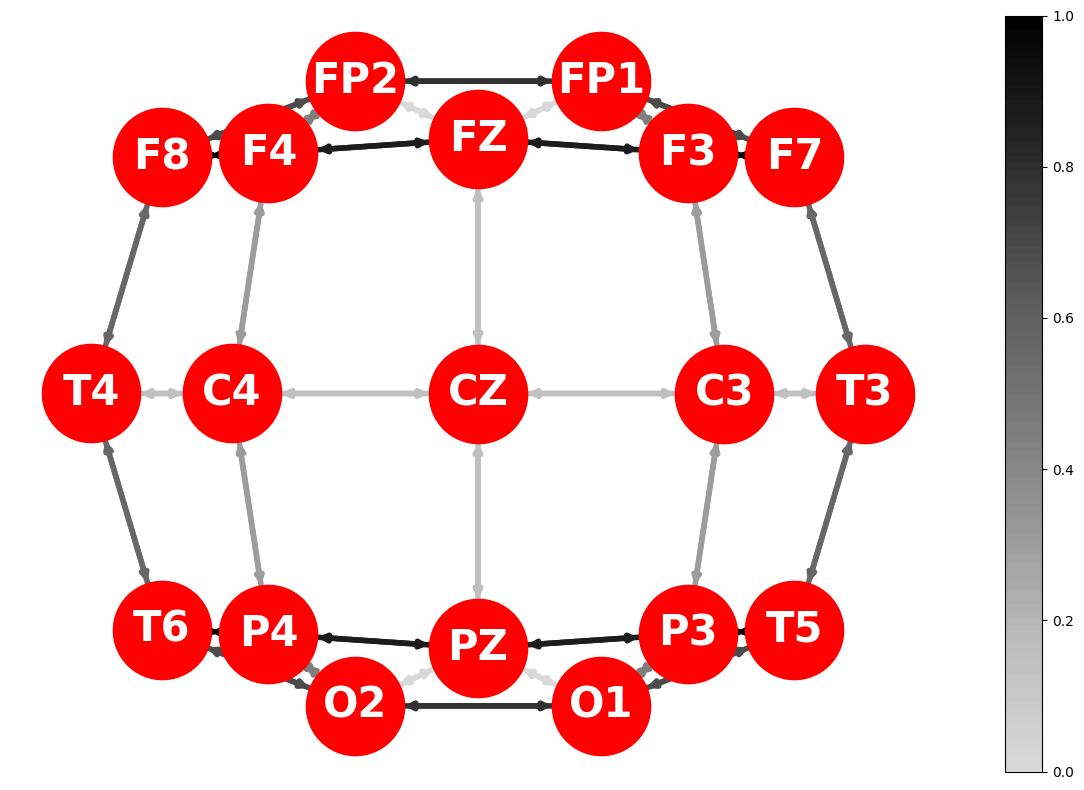

In [9]:
draw_graph_weighted_edge(adj_mx, node_id_dict, pos_spec, is_directed=True, plot_colorbar=True, font_size=30)